# INM434 Natural Language Processing Final Report

## By Ho Yin Tam

Import the library.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Import the training set and test set.

In [12]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

Convert the X_train to series data type.

In [13]:
X_train_text = X_train['text']
X_test_text = X_test['text']

Reshape the target label of y_train and y_test.

In [14]:
y_train_reshape = np.ravel(y_train)
y_test_reshape = np.ravel(y_test)

### Baseline model

### Feature extraction

Count vectorizer.

In [15]:
# Initiate the count vectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the text data 
X_train_count = count_vectorizer.fit_transform(X_train_text)
X_test_count = count_vectorizer.transform(X_test_text)

# Convert it for modelling
X_train_count_array = X_train_count.toarray()
X_test_count_array = X_test_count.toarray()

Initiate the support vector machines model and train the model with the training set.

In [16]:
# Initiate the support vector machines model 
svm_count = SVC()

# Train the model with the training set
svm_count.fit(X_train_count_array, y_train_reshape)

SVC()

Use the test set to predict.

In [17]:
# Use the test set to predict
y_pred_count = svm_count.predict(X_test_count_array)
y_pred_count

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

Compute the confusion matrix and visualize it.

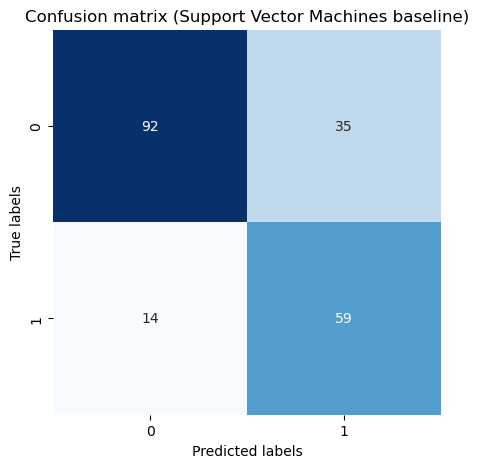

In [23]:
svm_count_cm = confusion_matrix(y_pred_count, y_test_reshape)
plt.figure(figsize = (5,5))
sns.heatmap(svm_count_cm, annot = True, cmap = 'Blues', cbar = False)
plt.title('Confusion matrix (Support Vector Machines baseline)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Compute accuracy, precision, recall, and F1 score of the baseline.

In [19]:
# Compute accuracy, precision, recall, and F1 score of the baseline
svm_accuracy_count = accuracy_score(y_pred_count, y_test_reshape)
svm_precision_count = precision_score(y_pred_count, y_test_reshape)
svm_recall_count = recall_score(y_pred_count, y_test_reshape)
svm_f1score_count = f1_score(y_pred_count, y_test_reshape)

# Display the result
print('Accuracy of support vector machines baseline:', svm_accuracy_count)
print('Precision of support vector machines baseline:', svm_precision_count)
print('Recall of support vector machines baseline:', svm_recall_count)
print('F1 score of support vector machines baseline:', svm_f1score_count)

Accuracy of support vector machines baseline: 0.755
Precision of support vector machines baseline: 0.6276595744680851
Recall of support vector machines baseline: 0.8082191780821918
F1 score of support vector machines baseline: 0.7065868263473054


Visualize the receiver operating characteristic (ROC) curve and compute the value of area under the curve (AUC).

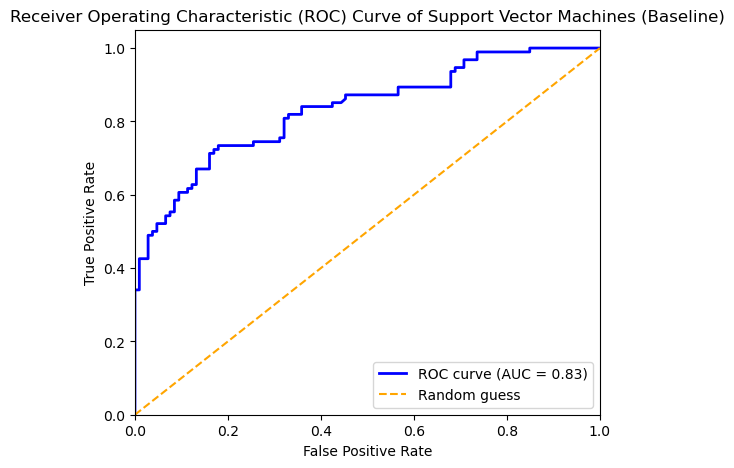

In [39]:
# Compute the value of area under the curve (AUC)
y_test_count_score = svm_count.decision_function(X_test_count_array)
svm_count_fpr, svm_count_tpr, svm_count_thresholds = roc_curve(y_test_reshape, y_test_count_score)
svm_count_auc = auc(svm_count_fpr, svm_count_tpr)

# Plot receiver operating characteristic (ROC) curve
plt.figure(figsize = (6, 5))
plt.plot(svm_count_fpr, svm_count_tpr, color = 'blue', lw = 2, label = 'ROC curve (AUC = %0.2f)' % svm_count_auc)
plt.plot([0, 1], [0, 1], color = 'orange', linestyle = '--', label = 'Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Support Vector Machines (Baseline)')
plt.legend(loc = 'lower right')
plt.show()

### Version using TF-IDF to extract features and grid search and ten fold cross validation to train the model 

### Feature extraction

TF-IDF.

In [24]:
# Initiate the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Convert it for modelling
X_train_tfidf_array = X_train_tfidf.toarray()
X_test_tfidf_array = X_test_tfidf.toarray()

Define the hyperparameter grid.

In [25]:
# Define the hyperparameter grid
svm_param_grid = {'kernel': ['linear', 'poly', 'rbf'],
                 'degree': [2, 3, 4],
                 'C': [0.1, 1, 10]}
svm_param_grid

{'kernel': ['linear', 'poly', 'rbf'], 'degree': [2, 3, 4], 'C': [0.1, 1, 10]}

Perform grid search with 10-fold cross validation.

In [28]:
# Initiate the support vector machines model 
svm_tfidf = SVC()

# Instantiate the Grid Search object
svm_tfidf_grid_search = GridSearchCV(svm_tfidf, svm_param_grid, cv = 10, scoring = 'accuracy')

# Fit the Grid Search object
svm_tfidf_grid_search.fit(X_train_tfidf_array, y_train_reshape)

# Get the highest accuracy, best hyperparameters, and the best model
svm_tfidf_train_accuracy = svm_tfidf_grid_search.best_score_
svm_tfidf_best_params = svm_tfidf_grid_search.best_params_
svm_tfidf_best_model = svm_tfidf_grid_search.best_estimator_

# Display the result
print('Best score is:', svm_tfidf_train_accuracy)
print("Best hyperparameters is:", svm_tfidf_best_params)

Best score is: 0.7926898734177216
Best hyperparameters is: {'C': 1, 'degree': 2, 'kernel': 'poly'}


Use the best model and test set to predict.

In [30]:
# Use the test set to predict
y_pred_tfidf = svm_tfidf_best_model.predict(X_test_tfidf_array)
y_pred_tfidf

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

Compute the confusion matrix and visualize it.

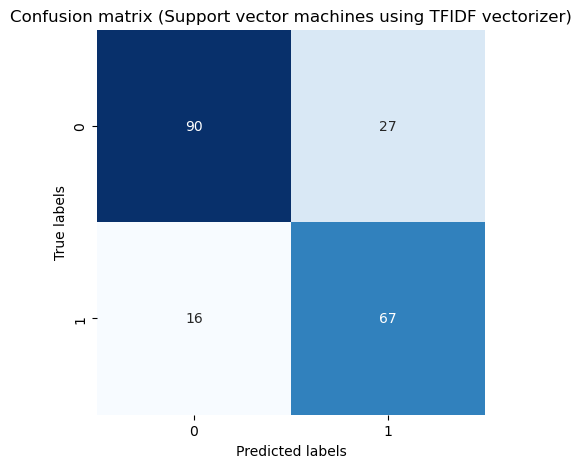

In [31]:
svm_tfidf_cm = confusion_matrix(y_pred_tfidf, y_test_reshape)
plt.figure(figsize = (5,5))
sns.heatmap(svm_tfidf_cm, annot = True, cmap = 'Blues', cbar = False)
plt.title('Confusion matrix (Support vector machines using TFIDF vectorizer)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Compute accuracy, precision, recall, and F1 score.

In [34]:
# Compute accuracy, precision, recall, and F1 score
svm_accuracy_tfidf = accuracy_score(y_pred_tfidf, y_test_reshape)
svm_precision_tfidf = precision_score(y_pred_tfidf, y_test_reshape)
svm_recall_tfidf = recall_score(y_pred_tfidf, y_test_reshape)
svm_f1score_tfidf = f1_score(y_pred_tfidf, y_test_reshape)

# Display the result
print('Accuracy of support vector machines baseline:', svm_accuracy_tfidf)
print('Precision of support vector machines baseline:', svm_precision_tfidf)
print('Recall of support vector machines baseline:', svm_recall_tfidf)
print('F1 score of support vector machines baseline:', svm_f1score_tfidf)

Accuracy of support vector machines baseline: 0.785
Precision of support vector machines baseline: 0.7127659574468085
Recall of support vector machines baseline: 0.8072289156626506
F1 score of support vector machines baseline: 0.7570621468926554


Visualize the receiver operating characteristic (ROC) curve and compute the value of area under the curve (AUC).

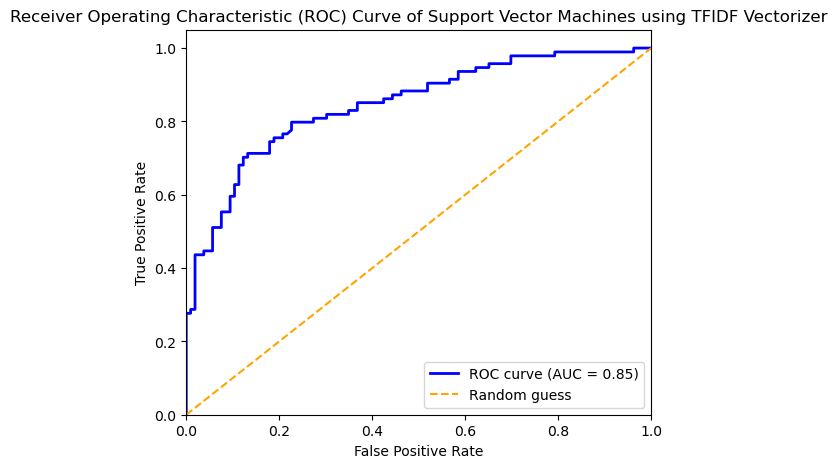

In [40]:
# Compute the value of area under the curve (AUC)
y_test_tfidf_score = svm_tfidf_best_model.decision_function(X_test_tfidf_array)
svm_tfidf_fpr, svm_tfidf_tpr, svm_tfidf_thresholds = roc_curve(y_test_reshape, y_test_tfidf_score)
svm_tfidf_auc = auc(svm_tfidf_fpr, svm_tfidf_tpr)

# Plot receiver operating characteristic (ROC) curve
plt.figure(figsize = (6, 5))
plt.plot(svm_tfidf_fpr, svm_tfidf_tpr, color = 'blue', lw = 2, label = 'ROC curve (AUC = %0.2f)' % svm_tfidf_auc)
plt.plot([0, 1], [0, 1], color = 'orange', linestyle = '--', label = 'Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Support Vector Machines using TFIDF Vectorizer')
plt.legend(loc = 'lower right')
plt.show()

### Error analysis

In [36]:
#  Get the indices 
misclassified1_indices = (y_pred_tfidf == 1) & (y_test_reshape == 0)

# Extract the examples that are misclassified to positive
misclassified1_examples = X_test_text[misclassified1_indices]
print(len(misclassified1_examples))
print(misclassified1_examples)

16
30                                        hour seriously
33     go far many place ive never seen restaurant se...
39                                      even hello right
54     furthermore cant even find hour operation website
67                                        wont returning
97                        chain im fan beat place easily
98     immediately said wanted talk manager want talk...
102    problem charge sandwich bigger subway sub offe...
103                                                thing
105                  pale color instead nice char flavor
120    ambiance feel like buffet setting douchey indo...
122               bar vega ever recall charged tap water
140              checked place couple year ago impressed
141                                 place honestly blown
166                      buffet bellagio far anticipated
199    love sushi found kabuki overpriced overhip und...
Name: text, dtype: object


In [37]:
#  Get the indices 
misclassified0_indices = (y_pred_tfidf == 0) & (y_test_reshape == 1)

# Extract the examples that are misclassified to positive
misclassified0_examples = X_test_text[misclassified0_indices]
print(len(misclassified0_examples))
print(misclassified0_examples)

27
2                                                   back
10     deal included tasting drink jeff went beyond e...
18                           would recommend saving room
21                much better ayce sushi place went vega
46                      could care le interior beautiful
47           also combo like burger fry beer decent deal
51              highquality chicken chicken caesar salad
55                                             plus buck
58                               conclusion filling meal
62                                  sushi strip place go
63                                       one bite hooked
70                                             complaint
71           got enjoy seafood salad fabulous vinegrette
81                                           worth drive
89                                            omelet die
95     went bachi burger friend recommendation disapp...
124    sure order dessert even need pack togo tiramis...
129                      cou